In [1]:
import numpy as np
import pandas as pd

In [2]:
# Dataset: -- A classification problem
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv("pima-indians-diabetes.data", names=names)
dataframe.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
X= dataframe[['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']]
y= dataframe['class']

In [4]:
# Missing values: 
# there are zeros in places where they are biologically impossible, such as the blood pressure attribute.
# It seems very likely that zero values encode missing data. 
# However, since the dataset donors made no such statement we encourage you to use your best judgement 
# and state your assumptions.

In [5]:
# Apply NB classifier, and evaluate the model using Cross Validation
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

clf = GaussianNB()

# fit the classifier on the training features and labels
#clf.fit(X, y) 

scoresAcc= cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Accuracy values: "+ str(list(scoresAcc)))
print('Mean:%.2f' %scoresAcc.mean())

Accuracy values: [0.75324675324675328, 0.72727272727272729, 0.74675324675324672, 0.78431372549019607, 0.74509803921568629]
Mean:0.75


In [6]:
X.shape

(768, 8)

# Feature Selection / Dimensionality Reduction

# 1. Principal component analysis (PCA)

(http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

## Example 1: 

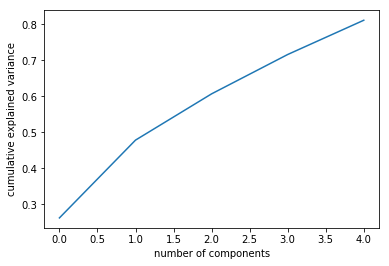

(768, 5)
Explained Variance: [ 0.26179749  0.21640127  0.12870373  0.10944113  0.09529305]
[[ 0.1284321   0.39308257  0.36000261  0.43982428  0.43502617  0.45194134
   0.27061144  0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]
 [-0.01308692  0.46792282 -0.53549442 -0.2376738   0.33670893 -0.36186463
   0.43318905  0.07524755]
 [ 0.08069115 -0.40432871  0.05598649  0.03797608 -0.34994376  0.05364595
   0.8336801   0.0712006 ]
 [-0.47560573  0.46632804  0.32795306 -0.48786206 -0.34693481  0.25320376
   0.11981049 -0.10928996]]
Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')


In [37]:
from sklearn.decomposition import PCA

# feature extraction
from sklearn.preprocessing import StandardScaler
X_std = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns )

feat_selector= PCA(n_components=5) # n_components=3
X_new= feat_selector.fit_transform(X_std, y)

import matplotlib.pyplot as plt
plt.plot(np.cumsum(feat_selector.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

print(X_new.shape)

# summarize components
print("Explained Variance: " + str(feat_selector.explained_variance_ratio_)) # #Eigenvalues (normalized)
print(feat_selector.components_)  #Eigenvectors
print(X.columns)

In [39]:
print(pd.DataFrame(feat_selector.components_,columns=X_std.columns,index = ['PC-1','PC-2', 'PC-3', 'PC-4','PC-5']))


          preg      plas      pres      skin      test      mass      pedi  \
PC-1  0.128432  0.393083  0.360003  0.439824  0.435026  0.451941  0.270611   
PC-2  0.593786  0.174029  0.183892 -0.331965 -0.250781 -0.100960 -0.122069   
PC-3 -0.013087  0.467923 -0.535494 -0.237674  0.336709 -0.361865  0.433189   
PC-4  0.080691 -0.404329  0.055986  0.037976 -0.349944  0.053646  0.833680   
PC-5 -0.475606  0.466328  0.327953 -0.487862 -0.346935  0.253204  0.119810   

           age  
PC-1  0.198027  
PC-2  0.620589  
PC-3  0.075248  
PC-4  0.071201  
PC-5 -0.109290  


In [40]:
# After feature selection: Apply NB classifier, and evaluate the model using Cross Validation
clf = GaussianNB()

# fit the classifier on the training features and labels
#clf.fit(X, y) 

scoresAcc= cross_val_score(clf, X_new, y, cv=5, scoring='accuracy')
print("Accuracy values: "+ str(list(scoresAcc)))
print('Mean:%.2f' %scoresAcc.mean())

Accuracy values: [0.7142857142857143, 0.77272727272727271, 0.74675324675324672, 0.79084967320261434, 0.73856209150326801]
Mean:0.75
